## Business problem 
 A mall owner wants to understand  the customers who could be easily converted as the target customer and through which they can figure out the marketing ideas and make the strategy.
 I will be doing the Mall Customers Segmentation using ML algorithms.
 It is a unsupersied clustering problem, I will be using KMeans and DBSCAN.

# About the dateset 
Here is the link of the dataset

Link : https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python?datasetId=42674&sortBy=voteCount

# Importing libraries

In [ ]:
import pandas as pd
import missingno as mn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
from yellowbrick.cluster import KElbowVisualizer
from tabulate import tabulate
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import DBSCAN
from itertools import product
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Uploading the Dataset

In [ ]:
md= pd.read_csv("Mall_Customers.csv")
md.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
md.shape

(200, 5)

There are 200 rows and 5 Cols

In [ ]:
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
md.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


There are 5 columns:

*  Customer ID - 
*  Gender -
*  Age -
*  Annual Income (k$)
*  Spending Score (1-100)  

In [ ]:
md.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

/usr/local/lib/python3.10/dist-packages/missingno/missingno.py:61: UserWarning:

Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.



<Axes: >

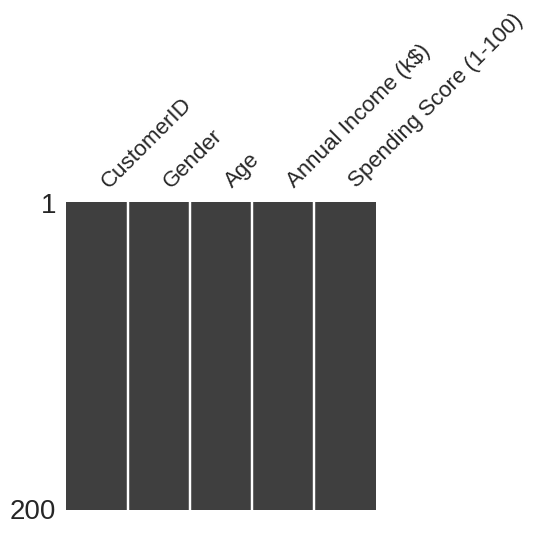

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
mn.matrix(md, ax=ax)

As we can see there are no null values and its makes are analysis a bit easier.



Here I am going to drop the col which is not so useful in the analysis " Customer ID".

In [ ]:
md.drop('CustomerID', axis = 1, inplace = True)

In [ ]:
md.shape

(200, 4)

# To see the statistics of the data 

In [ ]:
summary = pd.DataFrame(md.describe())
summary = summary.style.background_gradient(cmap='Blues') \
          .set_table_attributes("style='display: inline'") \
          .set_caption('Statistics of the Dataset') \
          .set_table_styles([
                {'selector': 'caption',
                 'props': [('font-size', '16px')]}
          ])
summary

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


## **Exploratory Data Analysis**

Here I am going to do some basic satistical data analysis on the present dataset.
Analysisng statistically will help us to understand the underlyting data.


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual Income (k$)'}>],
       [<Axes: title={'center': 'Spending Score (1-100)'}>, <Axes: >]],
      dtype=object)

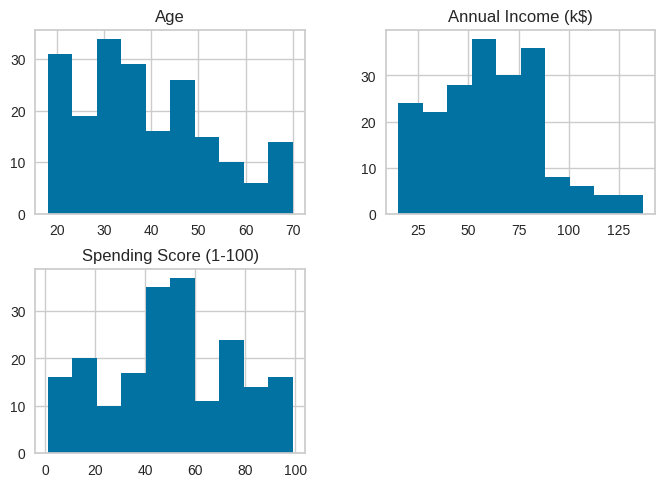

In [ ]:
md.hist()

In [ ]:
md['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

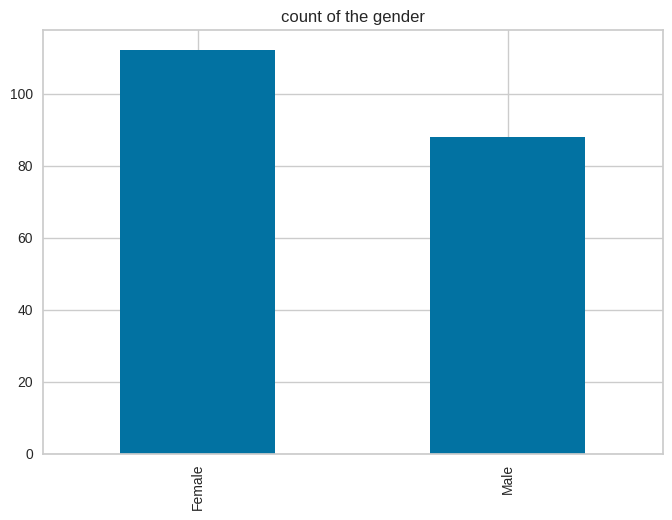

In [ ]:
md['Gender'].value_counts().plot(kind="bar")
plt.title("count of the gender")
plt.show()

To see the number of customers as per the age group : 

In [ ]:
# Define age groups
age_groups = ['18-25', '26-35', '36-45', '46-55', '55+']
age_bins = [18, 25, 35, 45, 55, float('inf')]

# Group the data by age group
md['Age Group'] = pd.cut(md['Age'], bins=age_bins, labels=age_groups, right=False)
age_group_counts = md['Age Group'].value_counts().reindex(age_groups, fill_value=0)

# Create the bar chart
fig = px.bar(x=age_groups, y=age_group_counts, color=age_groups,
             title='Number of customers per age group',
             labels={'x': 'Age Group', 'y': 'Count'})

fig.show()


Result : As we can see the number of the overall customers, 26-35 is having the highest count of customers 

Now creating the histogram of the ages for male and female customers in the dataset

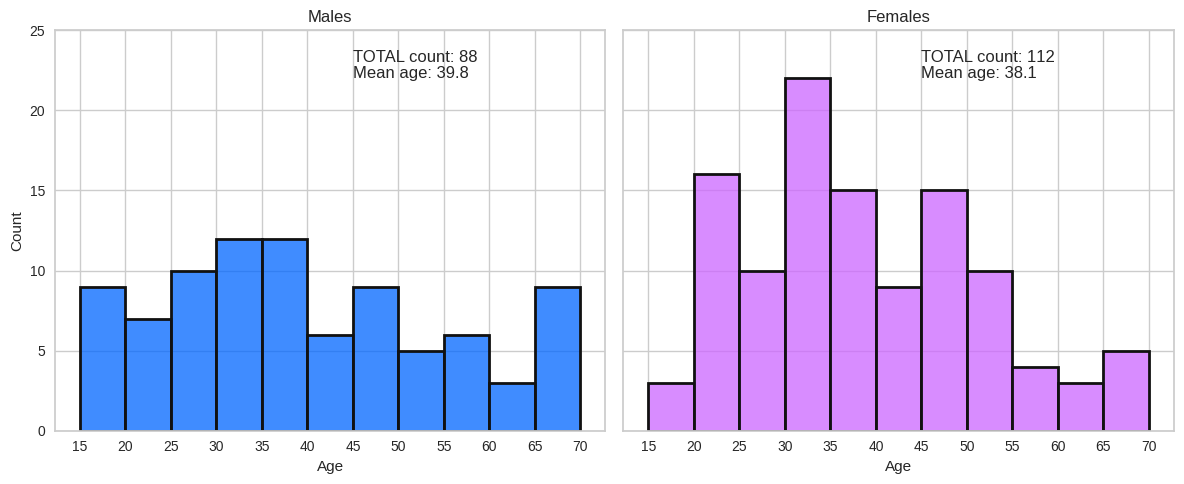

In [ ]:
# Subset data for males and females
males_age = md.loc[md['Gender'] == 'Male', 'Age']
females_age = md.loc[md['Gender'] == 'Female', 'Age']

# Set age bins
age_bins = range(15, 75, 5)

# Create subplots for males and females histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot histogram for males
sns.histplot(males_age, bins=age_bins, kde=False, color='#0066ff', edgecolor='k', linewidth=2, ax=ax1)
ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(45, 23, f"TOTAL count: {males_age.count()}")
ax1.text(45, 22, f"Mean age: {males_age.mean():.1f}")

# Plot histogram for females
sns.histplot(females_age, bins=age_bins, kde=False, color='#cc66ff', edgecolor='k', linewidth=2, ax=ax2)
ax2.set_xticks(age_bins)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(45, 23, f"TOTAL count: {females_age.count()}")
ax2.text(45, 22, f"Mean age: {females_age.mean():.1f}")

# Adjust spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()


 *The average age of the male is greater than the female (39.8 vs 38.1) also the distribution is uniform and gradual in the male part than the female counter part.*
 

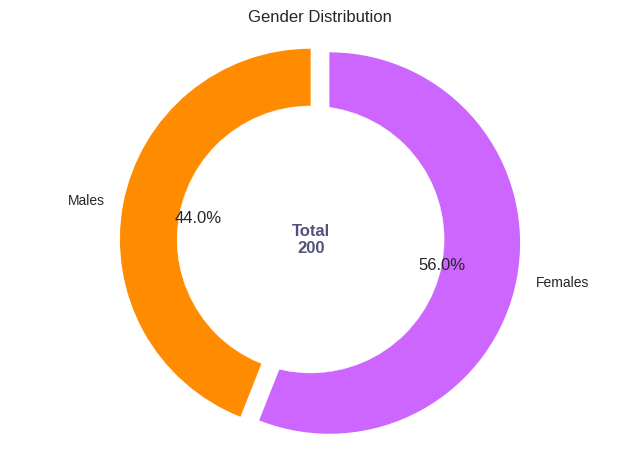

The percentage of females is: 56.0%
The percentage of males is: 44.0%


In [ ]:
# Count the number of males and females
num_males = md[md['Gender'] == 'Male'].shape[0]
num_females = md[md['Gender'] == 'Female'].shape[0]
total_count = num_males + num_females

# Calculate the percentage of females and males
percentage_females = (num_females / total_count) * 100
percentage_males = (num_males / total_count) * 100

# Create a pie chart with orange and light purple colors
labels = ['Males', 'Females']
sizes = [num_males, num_females]
colors = ['#FF8C00', '#CC66FF']  # Orange and light purple colors
explode = [0, 0.1]  # To highlight the Female segment

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Draw a small circle in the center with the total count
center_circle = plt.Circle((0, 0), 0.7, color='white')
fig.gca().add_artist(center_circle)
ax.annotate(f'Total\n{total_count}', (0, 0), va='center', ha='center', fontsize=12, color='#52527a', weight='bold')

# Equal aspect ratio ensures a circular pie chart
ax.axis('equal')
plt.title('Gender Distribution')

plt.show()

print(f"The percentage of females is: {percentage_females:.1f}%")
print(f"The percentage of males is: {percentage_males:.1f}%")

*The female customers are more than male customers. Female customers are 56% of the total customers.*

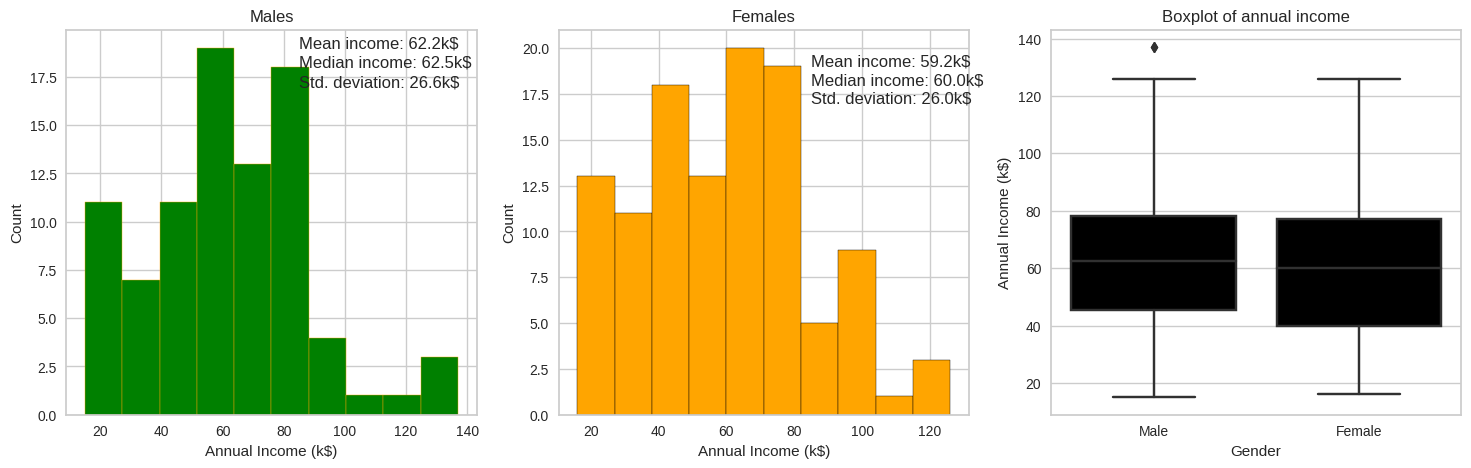

<Figure size 800x550 with 0 Axes>

In [ ]:
males_income = md[md['Gender'] == 'Male']['Annual Income (k$)']
females_income = md[md['Gender'] == 'Female']['Annual Income (k$)']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram for males' income
axes[0].hist(males_income, bins=10, color='green', edgecolor='orange')
axes[0].set_title('Males')
axes[0].set_xlabel('Annual Income (k$)')
axes[0].set_ylabel('Count')
axes[0].text(85, 19, "Mean income: {:.1f}k$".format(males_income.mean()))
axes[0].text(85, 18, "Median income: {:.1f}k$".format(males_income.median()))
axes[0].text(85, 17, "Std. deviation: {:.1f}k$".format(males_income.std()))

# Histogram for females' income
axes[1].hist(females_income, bins=10, color='orange', edgecolor='black')
axes[1].set_title('Females')
axes[1].set_xlabel('Annual Income (k$)')
axes[1].set_ylabel('Count')
axes[1].text(85, 19, "Mean income: {:.1f}k$".format(females_income.mean()))
axes[1].text(85, 18, "Median income: {:.1f}k$".format(females_income.median()))
axes[1].text(85, 17, "Std. deviation: {:.1f}k$".format(females_income.std()))

# Boxplot comparing males and females
box_props = {'facecolor': 'black'}  # Set color of the box to black
sns.boxplot(x='Gender', y='Annual Income (k$)', data=md, ax=axes[2], boxprops=box_props)
axes[2].set_title('Boxplot of annual income')
plt.show()

plt.tight_layout()
plt.show()

*Mean income of male is higher than female 62.2 vs 59.2k. Also, the Median income of the male part is higher than female 62.5k vs 60.0. And the standard deviation is almost similar.*

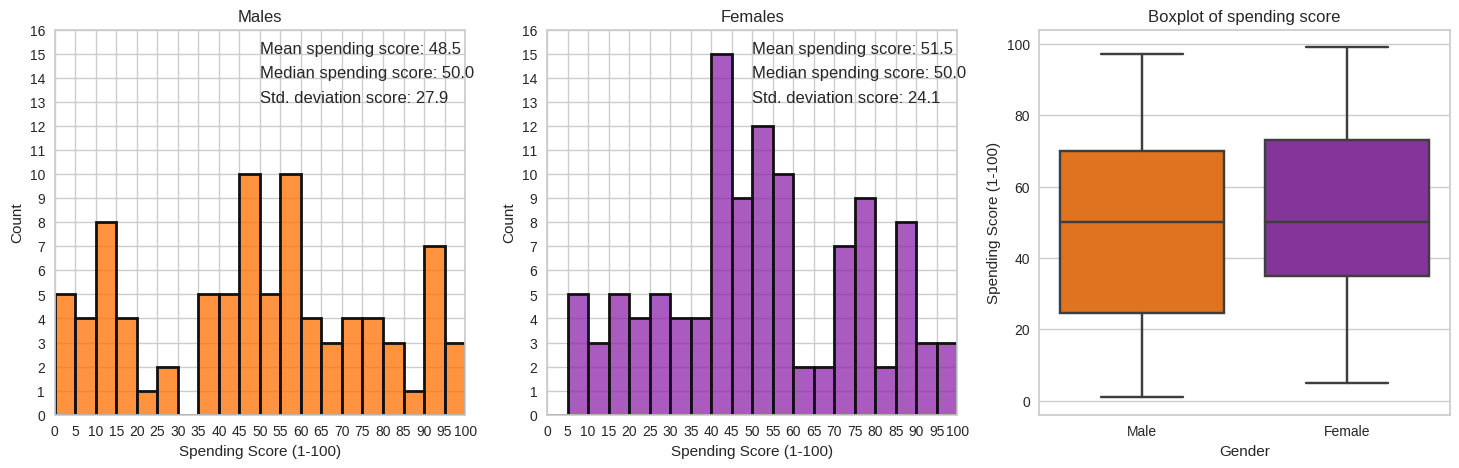

In [ ]:
males_spending = md[md['Gender'] == 'Male']['Spending Score (1-100)']
females_spending = md[md['Gender'] == 'Female']['Spending Score (1-100)']

spending_bins = range(0, 105, 5)

# Define vibrant colors
color_male = '#ff6f00'  # Orange
color_female = '#8e24aa'  # Purple

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram for males
sns.histplot(males_spending, bins=spending_bins, kde=False, color=color_male, ax=axes[0], edgecolor='k', linewidth=2)
axes[0].set_xticks(spending_bins)
axes[0].set_xlim(0, 100)
axes[0].set_yticks(range(0, 17, 1))
axes[0].set_ylim(0, 16)
axes[0].set_title('Males')
axes[0].set_ylabel('Count')
axes[0].text(50, 15, "Mean spending score: {:.1f}".format(males_spending.mean()))
axes[0].text(50, 14, "Median spending score: {:.1f}".format(males_spending.median()))
axes[0].text(50, 13, "Std. deviation score: {:.1f}".format(males_spending.std()))

# Histogram for females
sns.histplot(females_spending, bins=spending_bins, kde=False, color=color_female, ax=axes[1], edgecolor='k', linewidth=2)
axes[1].set_xticks(spending_bins)
axes[1].set_xlim(0, 100)
axes[1].set_yticks(range(0, 17, 1))
axes[1].set_ylim(0, 16)
axes[1].set_title('Females')
axes[1].set_ylabel('Count')
axes[1].text(50, 15, "Mean spending score: {:.1f}".format(females_spending.mean()))
axes[1].text(50, 14, "Median spending score: {:.1f}".format(females_spending.median()))
axes[1].text(50, 13, "Std. deviation score: {:.1f}".format(females_spending.std()))

# Boxplot comparing males and females
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=md, ax=axes[2], palette=[color_male, color_female])
axes[2].set_title('Boxplot of spending score')

plt.show()

*The mean spending score for women is higher in the female than the male spending score (51.5 vs 48.5). *italicized text*

Median income :
To understand the income level of all group I am going to calulate the median income for all age groups 

In [ ]:
medians_by_age_group = md.groupby(["Gender", pd.cut(md['Age'], age_bins)], as_index=False).median()

fig = px.bar(medians_by_age_group, x='Age', y='Annual Income (k$)', color='Gender',
             barmode='group', color_discrete_sequence=['#8e24aa', '#ff6f00'])

fig.update_layout(title='Median annual income of male and female customers',
                  xaxis_title='Age group', yaxis_title='Annual Income (k$)')

fig.show()


<ipython-input-333-b2b73d4e6c15>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



 

*   Some of the findings from this graph is that most of the customers whose 
    annual income is high is from the age group (25-45).
*   The male earning is comparatively higher than the female from the age group 
    (25-35)


*   And from the age 50 the female earnings gradually starts increasing in the 
    given dataset





Also, We can use another method to know the distribution of the age, annual income and spending altogether. 

<ipython-input-334-db96923730af>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-334-db96923730af>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-334-db96923730af>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use

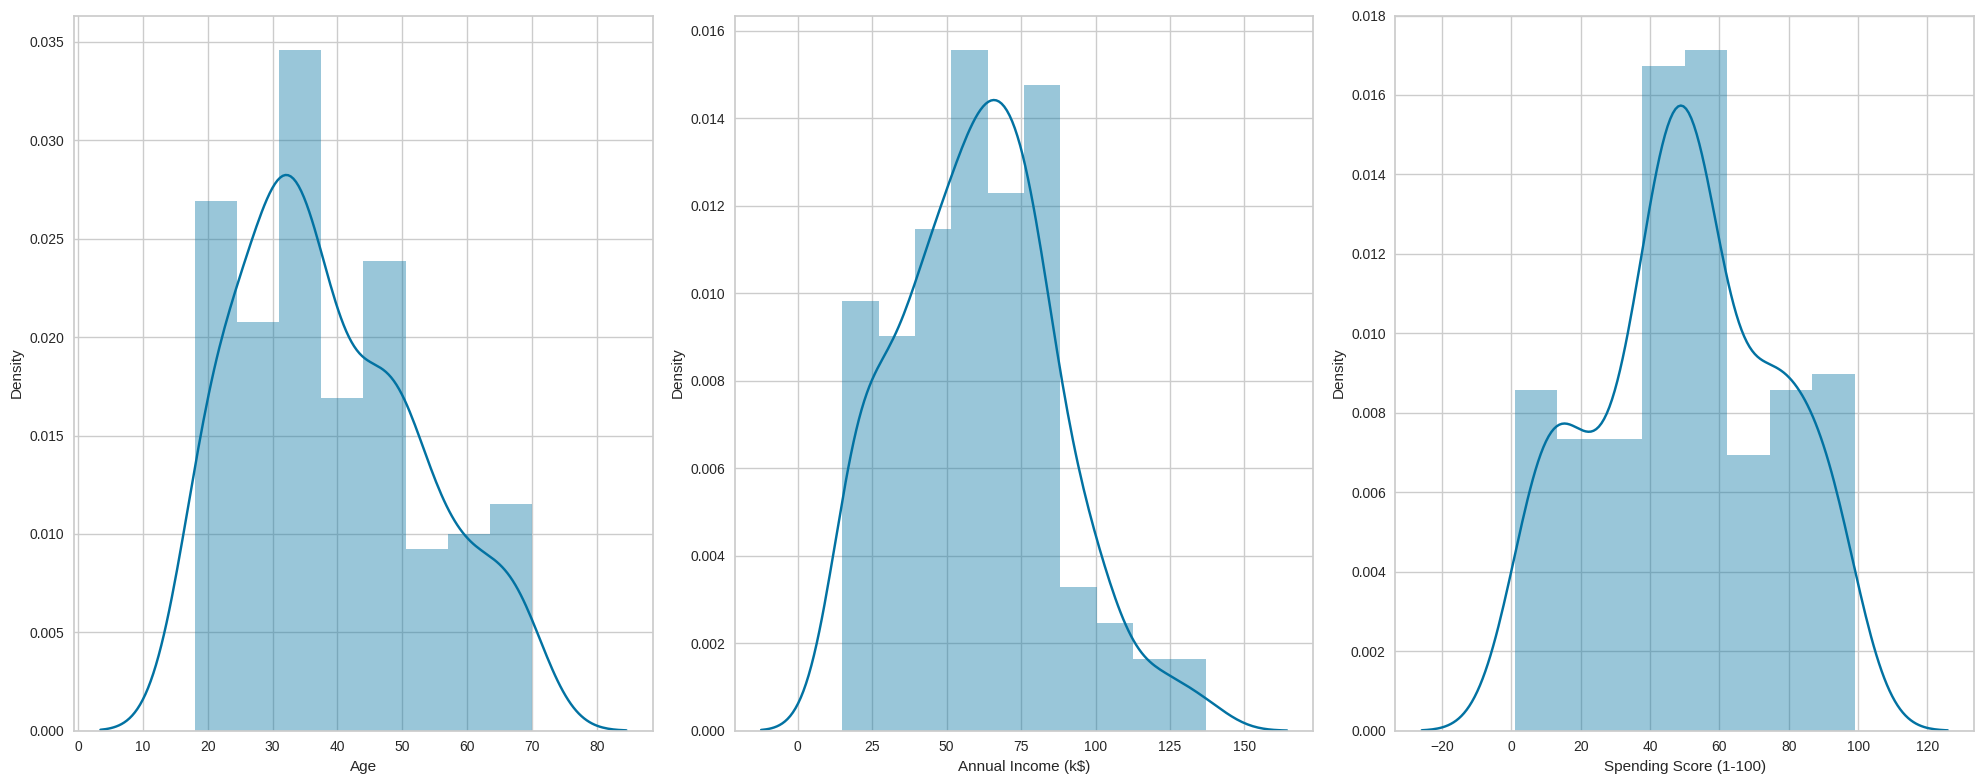

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

for i, col in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    sns.distplot(md[col], ax=axes[i], kde=True)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

As we can see from here ✈


1.   Age group from 30-40 have the higest density 
2.   The overall customers have the income range from 50-80 K
3.   Most of the customers have the spending score of 50 k



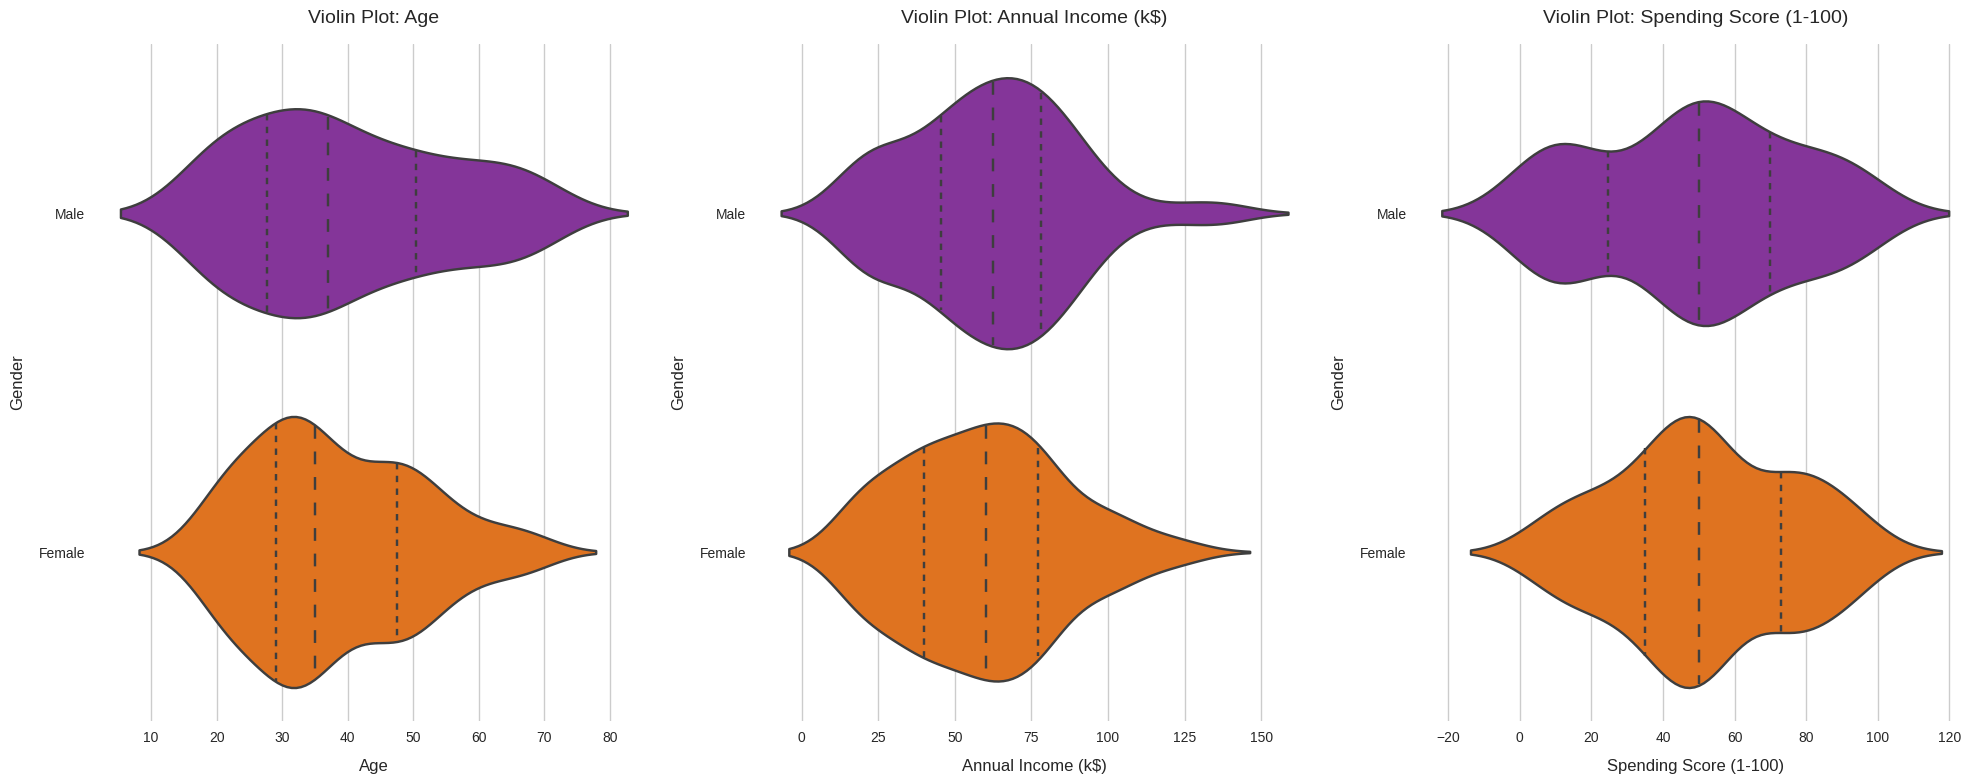

In [ ]:
plt.figure(figsize=(20, 8))
plotnumber = 1

# Define custom color palette
colors = ['#8e24aa', '#ff6f00']

for col in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    if plotnumber <= 3:
        ax = plt.subplot(1, 3, plotnumber)
        sns.violinplot(x=col, y='Gender', data=md, palette=colors, inner="quartile")
        sns.despine(left=True, bottom=True)  # Remove spines
        
        # Customize plot aesthetics
        ax.set_xlabel(col, fontsize=12, labelpad=10)
        ax.set_ylabel('Gender', fontsize=12, labelpad=10)
        ax.tick_params(axis='both', labelsize=10)
        ax.set_title(f'Violin Plot: {col}', fontsize=14, pad=15)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

<ipython-input-336-068617685731>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



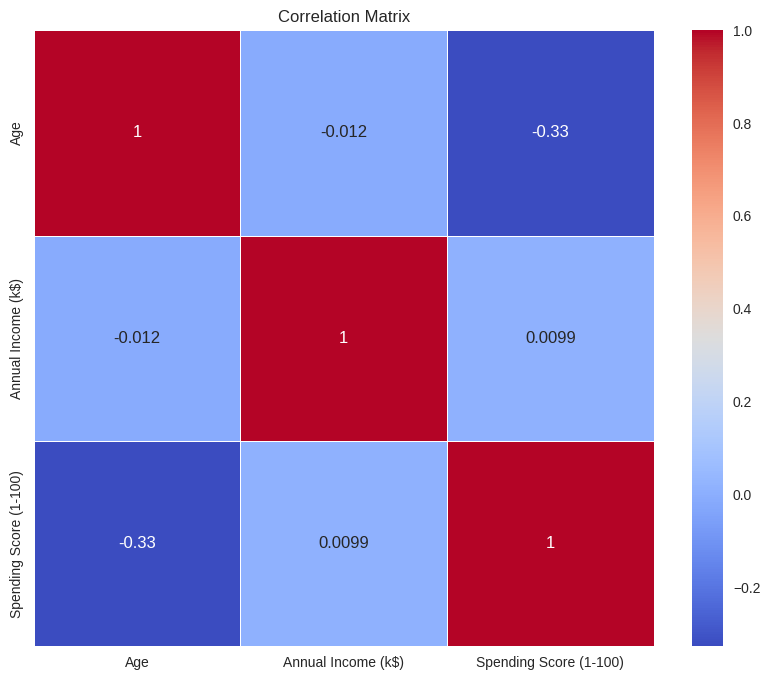

In [ ]:
correlation_matrix = md.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



Output :

From the graph it is clear that, 
1.   There is no high corelation.
2.   A Weak corelation between age and spending score - increase in age and the 
     spending score decreases.
3.   Ages and spending score have negative corelation -0.33 which implies older 
     older people might spend less than thier counterparts.
4.   Also, Spending score and annual income with corelation of 0.009, its shows that 




Observation from the Corelation Matrix : 

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



Text(0.5, 1.0, 'Relationship between Age and Gender')

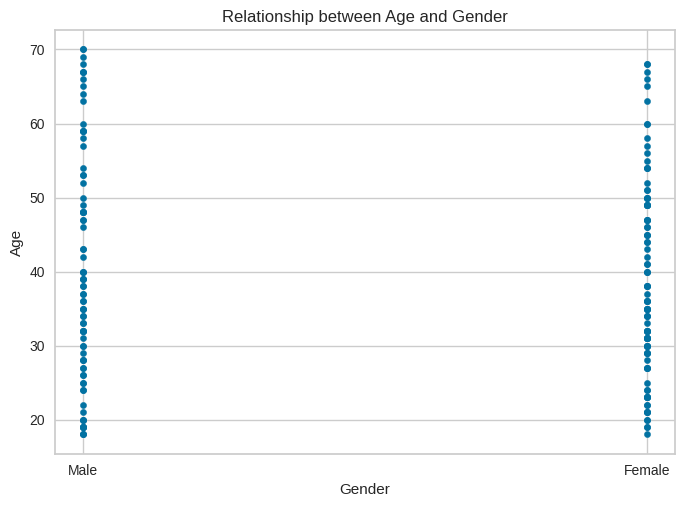

In [ ]:
# scatter the relationship between age and income 
md.plot(kind="scatter",x="Gender", y="Age")
plt.title("Relationship between Age and Gender")

Text(0.5, 1.0, 'Relationship between Gender and Annual income')

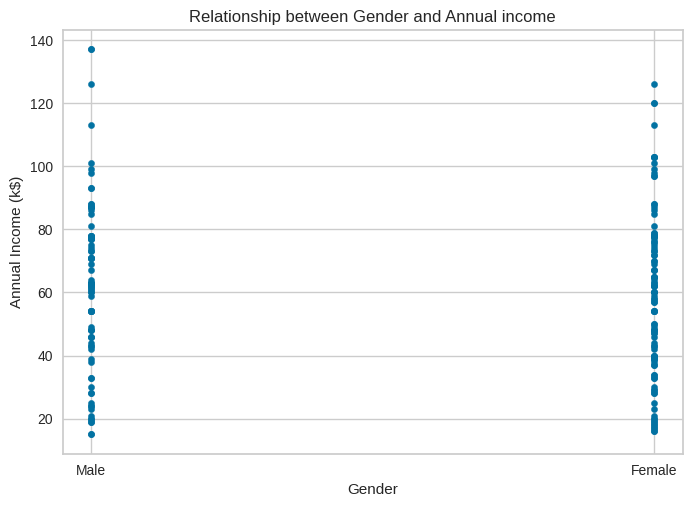

In [ ]:
md.plot(kind="scatter",x="Gender", y="Annual Income (k$)")
plt.title("Relationship between Gender and Annual income")

Text(0.5, 1.0, 'Relationship between Age and Annual income')

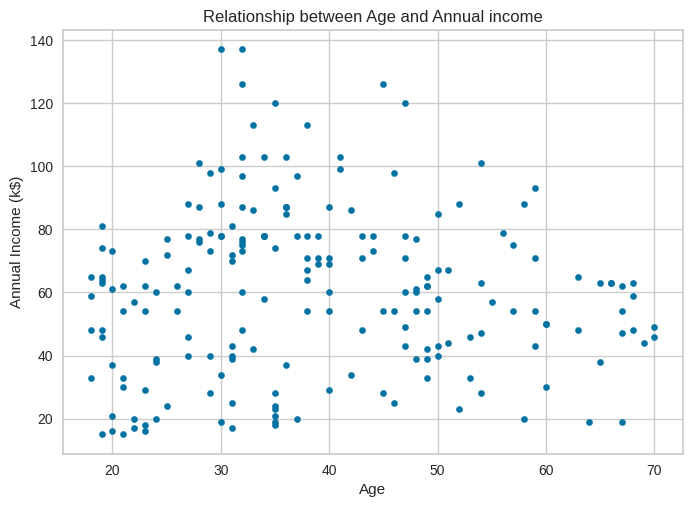

In [ ]:
md.plot(kind="scatter",x="Age", y="Annual Income (k$)")
plt.title("Relationship between Age and Annual income")

Text(0.5, 1.0, 'Relationship between Age and Spending Score (1-100)')

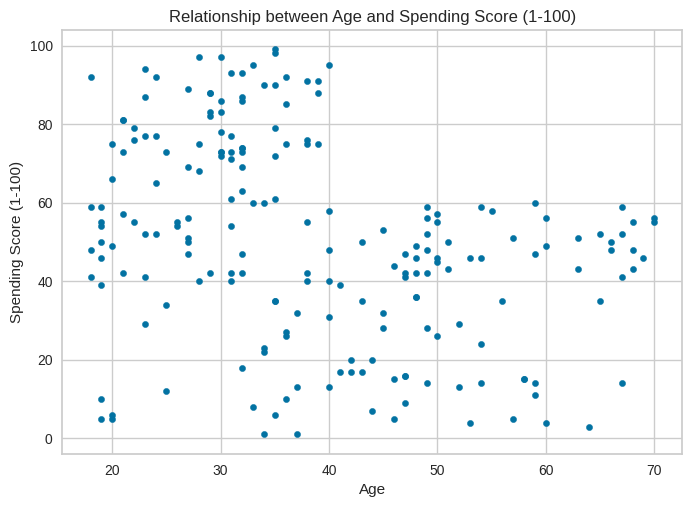

In [ ]:
md.plot(kind="scatter",x="Age", y="Spending Score (1-100)")
plt.title("Relationship between Age and Spending Score (1-100)")

Text(0.5, 1.0, 'Relationship between Age and Spending Score (1-100)')

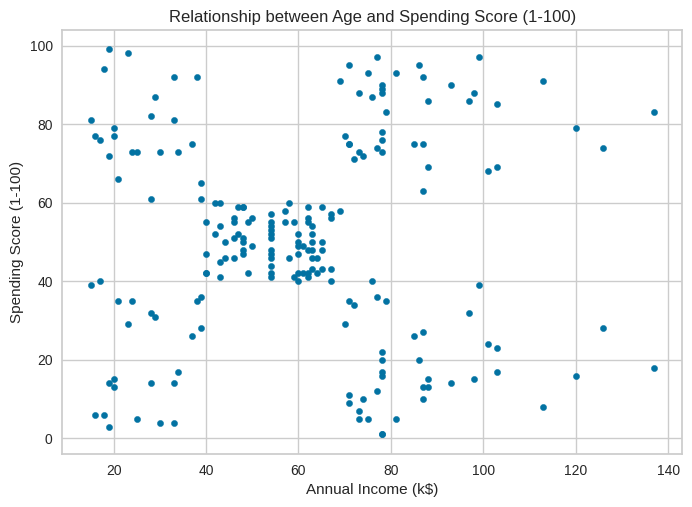

In [ ]:
md.plot(kind="scatter",x="Annual Income (k$)", y="Spending Score (1-100)")
plt.title("Relationship between Age and Spending Score (1-100)")

## Visualize the data 


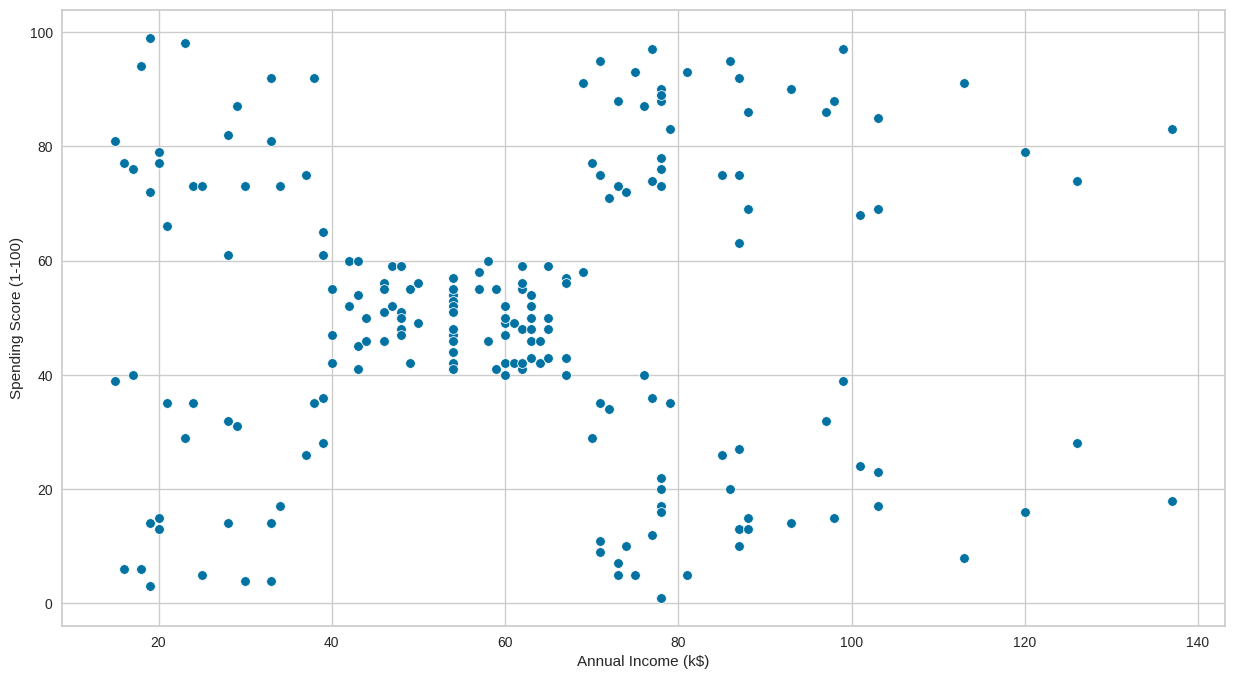

In [ ]:
X = md[['Annual Income (k$)', 'Spending Score (1-100)']].values

plt.figure(figsize=(15, 8))
sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.xlabel("Annual Income (k$)")
plt.ylabel('Spending Score (1-100)')
plt.show()

In [ ]:
#md_encoded = md.copy()  # Create a copy of the original dataframe

# Apply label encoding to the 'Gender' column
#label_encoder = LabelEncoder()
#md_encoded['Gender'] = label_encoder.fit_transform(md_encoded['Gender'])


In [ ]:
# Select only the numeric columns for scaling
#numeric_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
#md_numeric = md_encoded[numeric_columns]

In [ ]:
#scaler = MinMaxScaler()
#md_scaled = scaler.fit_transform(md_numeric)
#md_scaled = pd.DataFrame(md_scaled, columns=numeric_columns)

In [ ]:
#md_encoded[numeric_columns] = md_scaled

 Here looking at the graph its very difficult to understand how many clusters we have to make or the optimal value of K and so on
for such senarios we use elbow method 

## Unsupervised Machine Learning 

---



1.Since its a Unsupervised learnin, hence in Unsupervised learning the models are trained using unlabelled dataset and they react on the data without any supervision.
2. The goal of UML is to find the patterns, clusters and relationships in data without the guidance.
3.The primary objective is 
                          : Clustering 
                          : Dimentionality Reduction
                          : Anomaly Detection
                          
Overall, the unsupervised learning enables the exploration and extraction of meaningful insights from unlabeled data which will help for further analysis and better understanding and in decision making for business.



Here I will be using 2 Clustering methods 

---

1. K-MEANS
2. Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

K-Means

---

It is a popular unsupervised machine learning algorithm used for clustering data. 
Aim: 
It aims to partition the data in K - Clusters, where each clusters represents a group of data points that are similar to each other and not simillar to the data points in the other clusters.

Three important steps in K-MEANS :             
1. Splitting the samples into intial groups by using seed points. The sample nearest to these seed points will form the initial clusters.
2. Claculating the distance between each samples and the centroids of the existing clusters. 
3. Calculating the newly created clusters centroids by understanding or calculating the mean or the average of the samples assigned to each clusters.
4. The updated centroids represents the new central points of the clusters.




## Finding K using Elbow method
---

Both methods are useful in determining the appropriate number of clusters, but the KElbowVisualizer provides a more automated and standardized approach. It evaluates multiple scoring metrics and provides a visual plot for easy interpretation. It is recommended to use the KElbowVisualizer as it simplifies the process and provides more comprehensive insights.

In order to find the exact or approx number of clusters, I am going to use the elbow method in which the inertia will be taken in between (2,10).

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

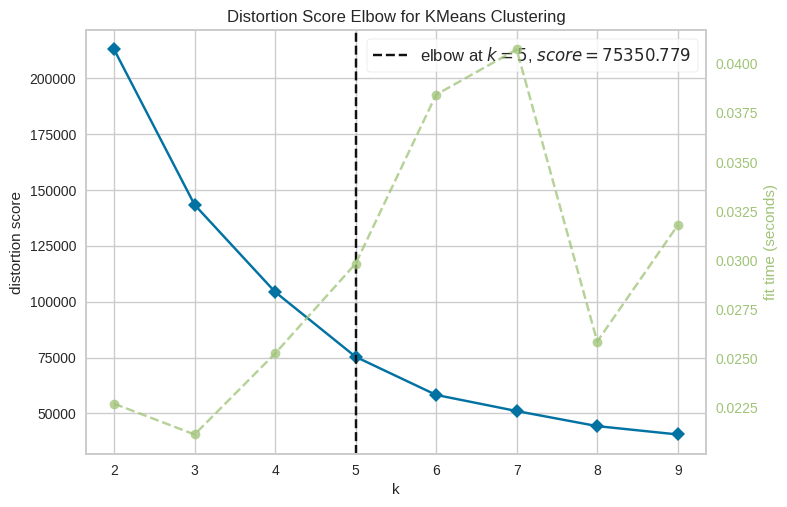

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:

X = md[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
#X_1 = md_encoded[numeric_columns]
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), colors='yellow', bg='black')

visualizer.fit(X)
visualizer.show()

The output of the graph indicates that :  


---


1. Distortion score decreases as the k increases.
2. The elbow score is not so clear, however I am going to go with 5 or 6.    


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

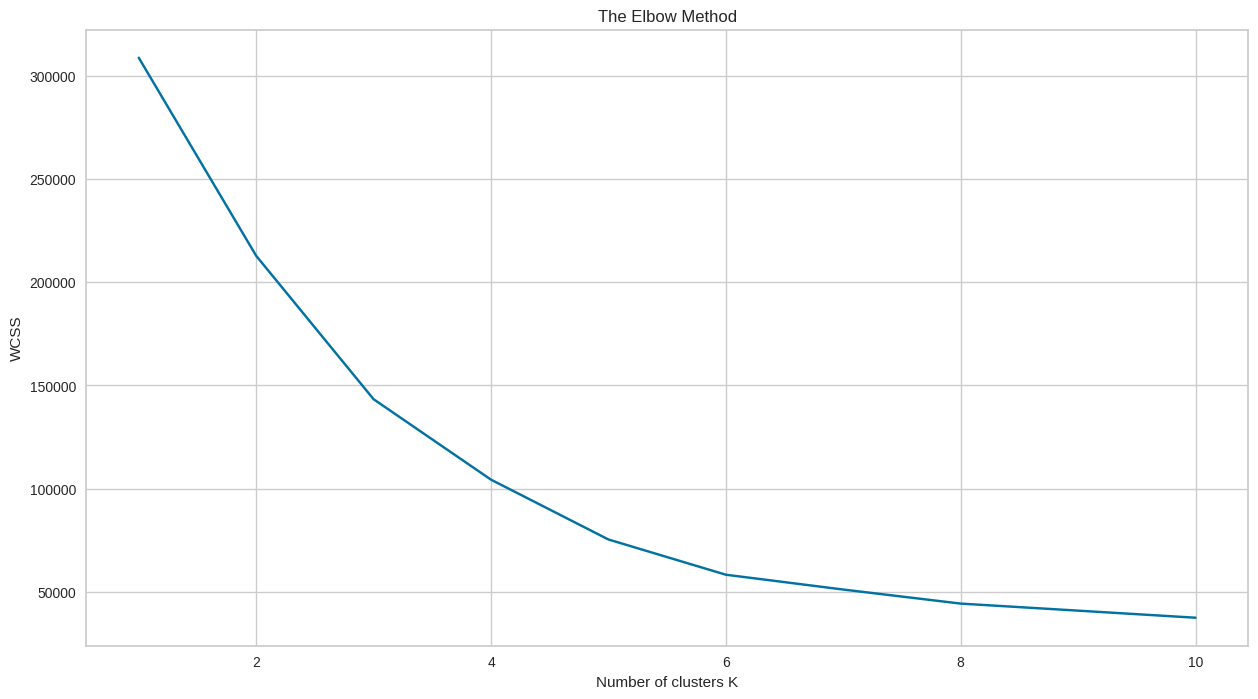

In [ ]:

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,8))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters K')
plt.ylabel('WCSS')
plt.show()

Since the number of the clusters is not clear, I am going to use another method called "silhuette score"

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

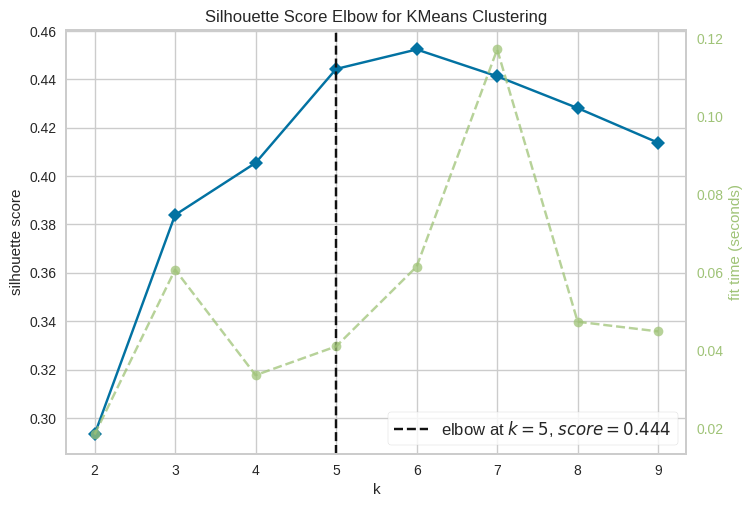

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
#X_1 = md_encoded[numeric_columns]
X_1= md[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
model = KMeans(random_state = 1)
visualizer = KElbowVisualizer(model, k=(2,10),metric='silhouette')
visualizer.fit(X)
visualizer.show()


This silhouette score also indicates 5 clusters.
Lets process further 


In [ ]:
# Training the dataset 
#Kmeans = KMeans(n_clusters=5,init='k-means++', random_state=0)
#Y = Kmeans.fit_predict(X)

# Clusters 5 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



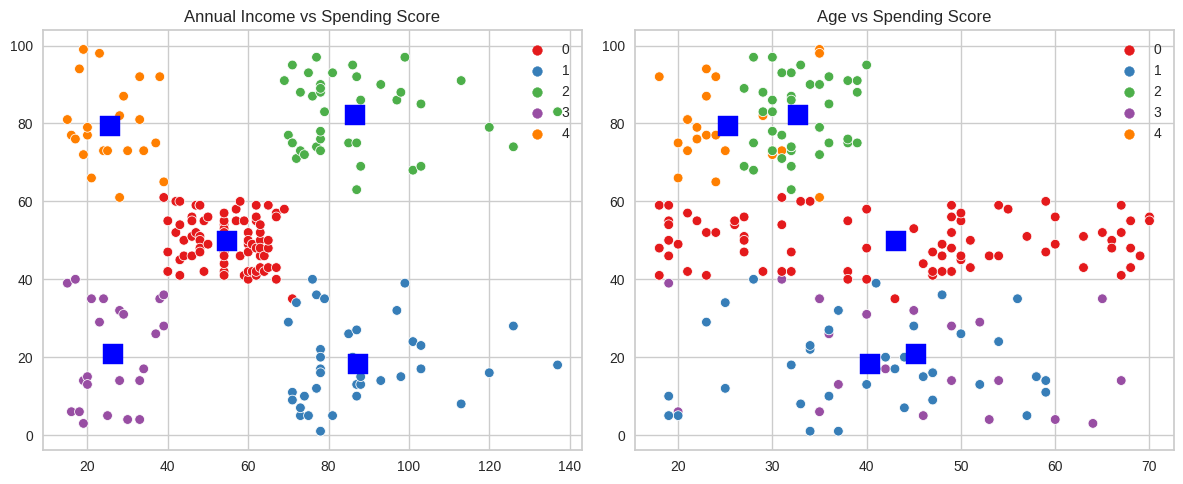

In [ ]:
# To fit the Kmeans with 4 clusters
kmeans = KMeans(n_clusters=5, init='k-means++')
kmeans.fit(X)
# Assign cluster labels to data points
labels = kmeans.labels_
X_clustered = X.copy()
X_clustered['Cluster'] = labels


# Plotting the clusters
fig_a, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=X_clustered,
                hue='Cluster', palette='Set1', ax=axes[0])
axes[0].scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
                marker='s', s=200, c='blue')
axes[0].set_title('Annual Income vs Spending Score')

sns.scatterplot(x='Age', y='Spending Score (1-100)', data=X_clustered,
                hue='Cluster', palette='Set1', ax=axes[1])
axes[1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2],
                marker='s', s=200, c='blue')
axes[1].set_title('Age vs Spending Score')

for ax in axes:
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()









KMeans has produced 5 clusters based on the dataset: 


---




1. Cluster 1 :  The clusters consists of customers with low income and high spending score 
2. Cluster 2 : The Clusters consists of customers with medium annual income and medium spending score 
3. Cluster 3 : The Clusters consists of customers with high annual income and low spending score
4. Cluster 4 : The Clusters consists of customers with high annual income and high spending score.
5. Cluster 5 : The Clusters consists of customers with low annual income and low spending score.

Interestingly, There are no distinct pattern observed in terms of customers age and spending score.
The primary distingusing factor can be seen between the annual income and the spending score.





# To check the size of the clusters 

In [ ]:
Cluster_size = X_clustered['Cluster'].value_counts().reset_index()
Cluster_size.columns = ["cluster","Count"]
print(tabulate(Cluster_size,headers = "keys",tablefmt='fancy_grid'))

╒════╤═══════════╤═════════╕
│    │   cluster │   Count │
╞════╪═══════════╪═════════╡
│  0 │         0 │      79 │
├────┼───────────┼─────────┤
│  1 │         2 │      39 │
├────┼───────────┼─────────┤
│  2 │         1 │      37 │
├────┼───────────┼─────────┤
│  3 │         3 │      23 │
├────┼───────────┼─────────┤
│  4 │         4 │      22 │
╘════╧═══════════╧═════════╛


1. Here, the first cluster which is 0 is having 79 observations and other two clusters containin 39 and 36 respectively.
2. The last two clusters contains the smallest count of observations.

A 3D View of the 5 Clusters 

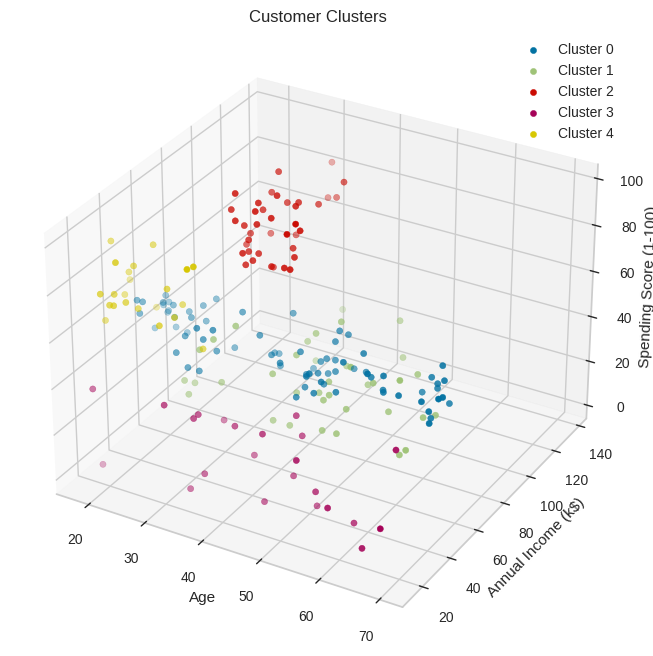

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection = "3d")
# Plotting the Clusters
for cluster_label in range(5):
    cluster_points = X_clustered[X_clustered['Cluster'] == cluster_label]
    ax.scatter(cluster_points['Age'], cluster_points['Annual Income (k$)'], cluster_points['Spending Score (1-100)'],
               label=f'Cluster {cluster_label}')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('Customer Clusters')

plt.legend()
plt.show()

In [ ]:
kmeans.cluster_centers_

array([[43.12658228, 54.82278481, 49.83544304],
       [40.32432432, 87.43243243, 18.18918919],
       [32.69230769, 86.53846154, 82.12820513],
       [45.2173913 , 26.30434783, 20.91304348],
       [25.27272727, 25.72727273, 79.36363636]])

To check the clusters I am going to check the silhouette Visualiser

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



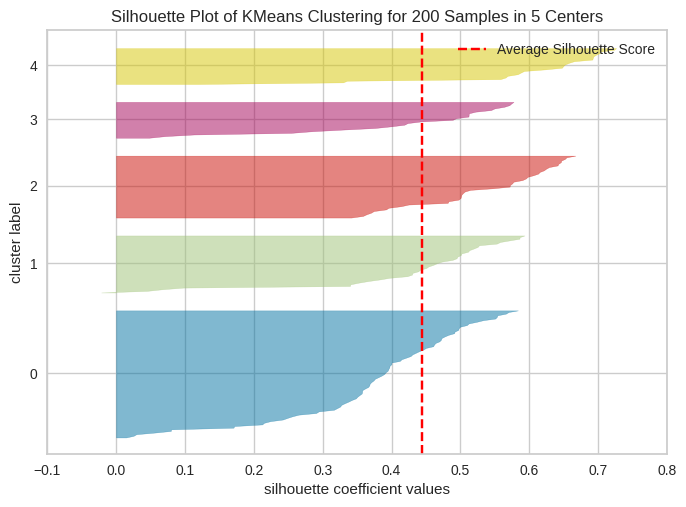

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++')
vis = SilhouetteVisualizer(kmeans,colors = 'yellowbrick')
vis.fit(X)
vis.show()
plt.show()

 # Now lets take 6 Clusters to check the senario

---



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



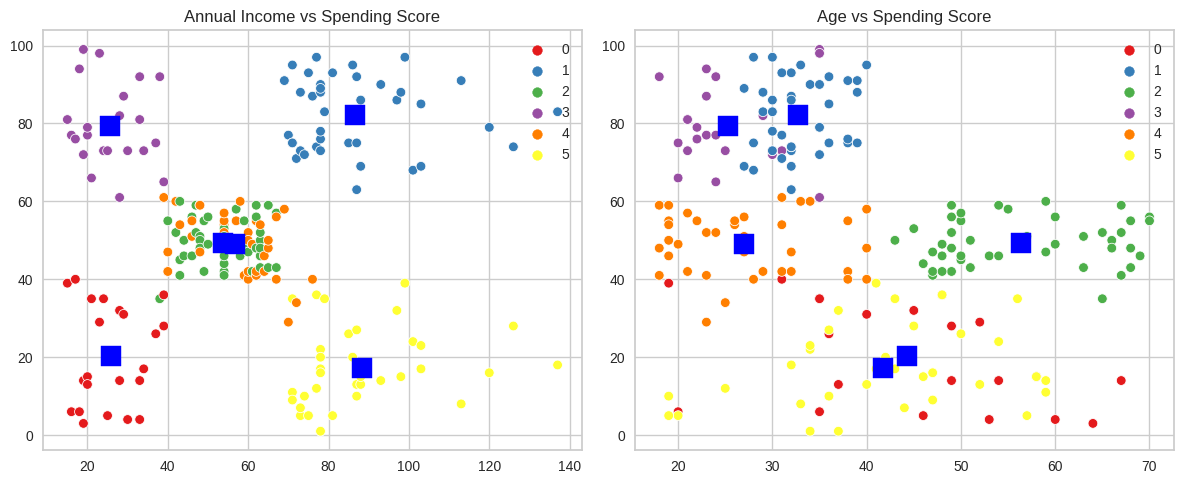

In [ ]:
km_6 = KMeans(n_clusters=6, init='k-means++',random_state=42)
km_6.fit(X)
# Assigning the labels to the data points
labels_6 = km_6.labels_
X_clustered_6 = X.copy()
X_clustered_6['Cluster'] = labels_6


# Plotting the clusters
fig_6, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=X_clustered_6,
                hue='Cluster', palette='Set1', ax=axes[0])
axes[0].scatter(km_6.cluster_centers_[:, 1], km_6.cluster_centers_[:, 2],
                marker='s', s=200, c='blue')
axes[0].set_title('Annual Income vs Spending Score')

sns.scatterplot(x='Age', y='Spending Score (1-100)', data=X_clustered_6,
                hue='Cluster', palette='Set1', ax=axes[1])
axes[1].scatter(km_6.cluster_centers_[:, 0], km_6.cluster_centers_[:, 2],
                marker='s', s=200, c='blue')
axes[1].set_title('Age vs Spending Score')

for ax in axes:
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()




The K-Means generated the follow 6 clusters 

---
1. Cluster 0 : Customers with low income and low spending score
2. Cluster 1 : Customers with high annual income and high spending score
3. Cluster 2 : Customers with medium annual income and medium score
4. Cluster 3 : Customers with low annual income and high spending score
5. Cluster 4 : Customers with medium annual income and medium score
6. Cluster 5 : Customers with Hight annual income and low spending score 
However, there are no distinct groups in terms of customer age



In [ ]:
#plt.figure(figsize=(15,8))
#plt.scatter (X[Y==0,0], X[Y==0,1], s=50, c='red', label='Cluster 1')
#plt.scatter (X[Y==1,0], X[Y==1,1],s=50, c='pink', label='Cluster 2')
#plt.scatter (X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='cluster 3')
#plt.scatter (X[Y==3,0], X[Y==3,1], s=50, c='green', label= 'Cluster 4')
#plt.scatter (X[Y==4,0], X[Y==4,1], s=50, c='orange', label='cluster 5')
#plt.scatter (Kmeans.cluster_centers_[:,0], Kmeans.cluster_centers_[:,1], s=200, c='black')
#plt.title('Customer Groups')
#plt.xlabel('Annual Income')
#plt.ylabel('Spending Score')
#plt.show 

In [ ]:
Cluster_size_6 = X_clustered_6['Cluster'].value_counts().reset_index()
Cluster_size_6.columns = ["cluster","Count"]
print(tabulate(Cluster_size_6,headers = "keys",tablefmt='fancy_grid'))

╒════╤═══════════╤═════════╕
│    │   cluster │   Count │
╞════╪═══════════╪═════════╡
│  0 │         2 │      44 │
├────┼───────────┼─────────┤
│  1 │         1 │      39 │
├────┼───────────┼─────────┤
│  2 │         4 │      38 │
├────┼───────────┼─────────┤
│  3 │         5 │      35 │
├────┼───────────┼─────────┤
│  4 │         0 │      22 │
├────┼───────────┼─────────┤
│  5 │         3 │      22 │
╘════╧═══════════╧═════════╛


So, the first cluster is having the highest count or observation of 44 and the last two clusters are having the lowest count of 22.

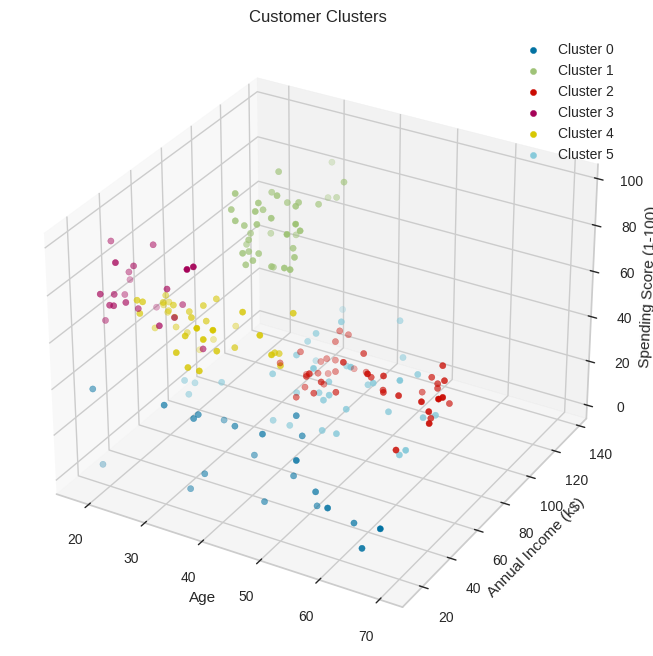

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection = "3d")
# Plotting the Clusters
for cluster_label in range(6):
    cluster_points = X_clustered_6[X_clustered_6['Cluster'] == cluster_label]
    ax.scatter(cluster_points['Age'], cluster_points['Annual Income (k$)'], cluster_points['Spending Score (1-100)'],
               label=f'Cluster {cluster_label}')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('Customer Clusters')

plt.legend()
plt.show()

In [ ]:
km_6.cluster_centers_

array([[44.31818182, 25.77272727, 20.27272727],
       [32.69230769, 86.53846154, 82.12820513],
       [56.34090909, 53.70454545, 49.38636364],
       [25.27272727, 25.72727273, 79.36363636],
       [27.        , 56.65789474, 49.13157895],
       [41.68571429, 88.22857143, 17.28571429]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



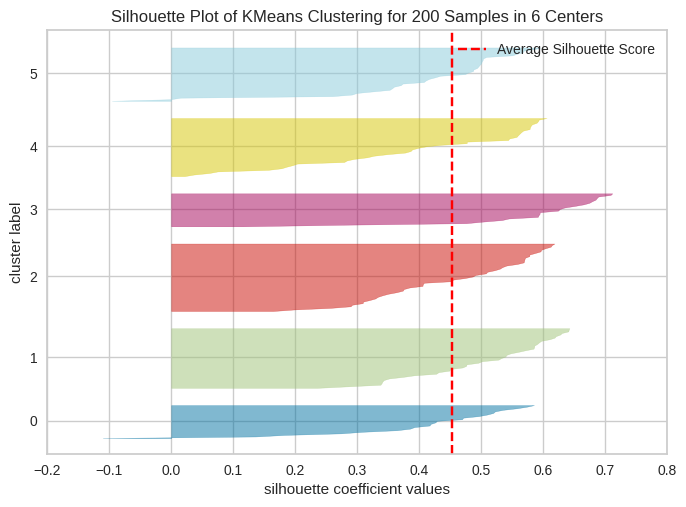

In [ ]:
kmeans_6= KMeans(n_clusters=6, init='k-means++')
vis = SilhouetteVisualizer(km_6,colors = 'yellowbrick')
vis.fit(X)
vis.show()
plt.show()



## DBSCAN


---


Density based spatial clustering of application with noises.
1. Its a denisty based clustering algorithm which groups the datapoints which are close to each other in the feature space.
2. The algorithm requires two parameters to be set 
                                                   (a) Episilon
                                                   (b) MinPts
Episilon defines the neigbourhood radius around a points while MinPts specifies the minimum number of data points within the Epsilon radius to form a dense region.
Also helps to detect outliers.
3. There are Core point as well, a datapoint can be considered as Core point if there at least MinPts within the Episilon neighbourhood.
4. This algorith selects an unvisited datapoints
5. If the point is the core point, create a new cluster and add the points  all directly density-reachable points to the cluster.
6. If the point is a border point it will assign it to the cluster.
7. Until all the datapoints have been visited, the result is a set of cluster.





Some facts about DBSCAN
1.  Advantages 
               - It does not require the number of clusters to be Predefined
               - It identifies clusters based on the density of the datapoints
               - However, it requires the porper setting of the values of the 
               - Epsilon and MinPts to obtain the good cllustering results.
               - It is effcient and can handle large dataset
2. Disadvantage 
               - It can struggle with the datset varrying densities or high 
                 dimensional data.
               - It is also very sensitive to the parameters and different 
                 parameters leads to different result in cluster. Hence parameter selection is an important stage in DBSCAN.
               
              



In [ ]:
eps_e = np.arange(8,12.75,0.25)
min_s = np.arange(3,10)
dbs = list(product(eps_e,min_s))

Since DBSCAN generates its own clusters based on the parameters provided.

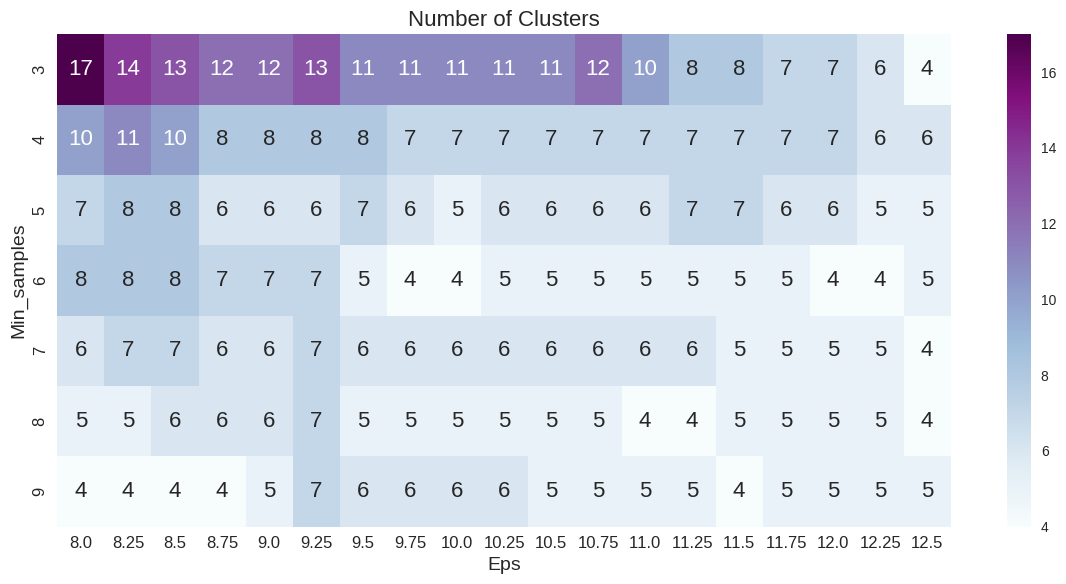

In [ ]:

c_l_u_s = []
s_i_l = []
mvp = pd.DataFrame.from_records(dbs, columns=['Eps', 'Mins'])

for pa in dbs:
    dbs_c = DBSCAN(eps=pa[0], min_samples=pa[1]).fit(X)
    c_l_u_s.append(len(np.unique(dbs_c.labels_)))
    s_i_l.append((silhouette_score(X, dbs_c.labels_)))

mvp['c_l_u_s'] = c_l_u_s
pivot_a = pd.pivot_table(mvp, values='c_l_u_s', index='Mins', columns='Eps')

fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(pivot_a, annot=True, annot_kws={"size": 16}, cmap="BuPu", ax=ax)

# Customize the plot
ax.set_title('Number of Clusters',fontsize=16)
ax.set_xlabel('Eps',fontsize=14)
ax.set_ylabel('Min_samples',fontsize=14)
ax.tick_params(axis='both',which='both',labelsize=12)

plt.tight_layout()
plt.show()




So from this heatplot, after the combination, there are mostly 4-7 clusters and also these differ in between 4-17.


---



In order to decide which combination to choose, silhuette score  a metric to be used to figure out or to calculate the goodness of the clusting technique.
1. Its value ranges from -1 to 1
2. "1" means the clusters are well seperated and are prominent
3. "0" means the distance between the clusters is not clear or significant.
4. "-1" means clusters not arranged properly.

<function matplotlib.pyplot.show(close=None, block=None)>

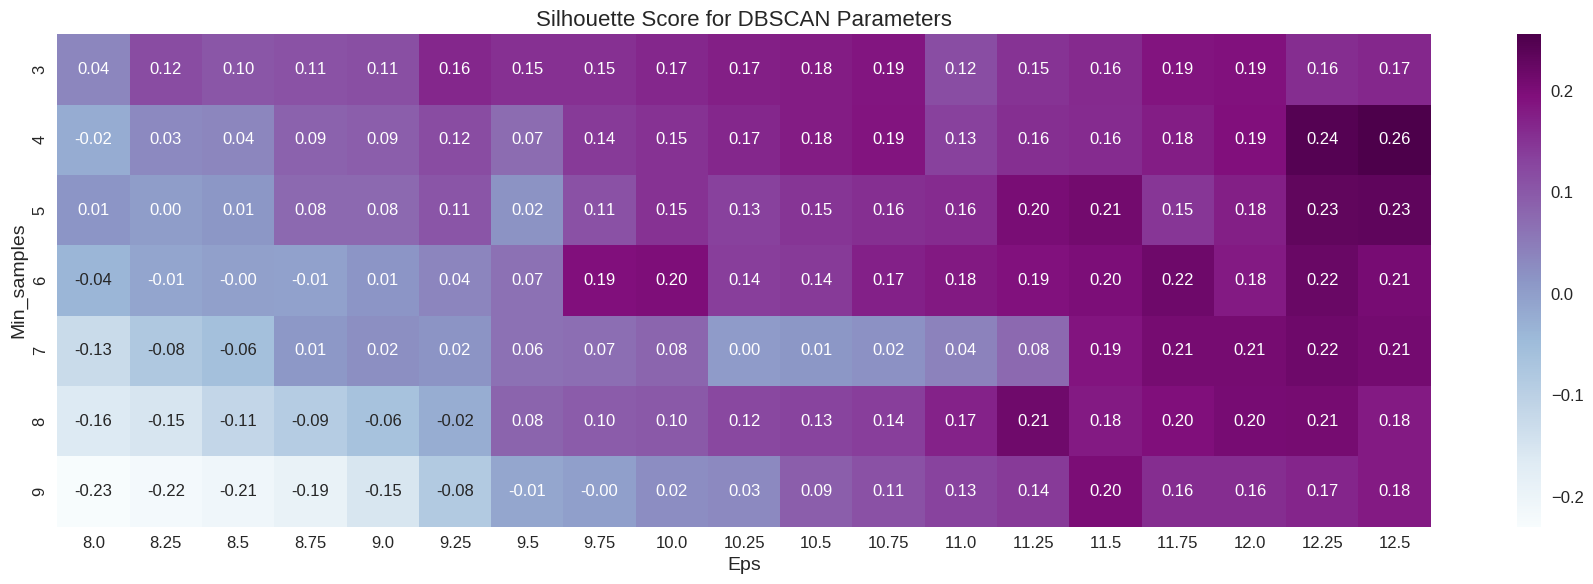

In [ ]:
mvp = pd.DataFrame.from_records(dbs, columns=['Eps', 'Mins'])
mvp['s_i_l'] = s_i_l
pivot_a = pd.pivot_table(mvp, values='s_i_l', index='Mins', columns='Eps')
fig_ss, ax = plt.subplots(figsize=(18, 6))
# Customize the heatmap
sns.heatmap(pivot_a, annot=True, annot_kws={"size": 12}, fmt=".2f", cmap="BuPu", cbar=True, ax=ax)
# Set the title and labels
ax.set_title('Silhouette Score for DBSCAN Parameters', fontsize=16)
ax.set_xlabel('Eps', fontsize=14)
ax.set_ylabel('Min_samples', fontsize=14)

# Adjust the tick labels size
ax.tick_params(axis='both', labelsize=12)

# Add color bar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)

plt.tight_layout()
plt.show


In [ ]:
dbs_2 = DBSCAN(eps=12.5,min_samples=4)
dbclustering_ = dbs_2.fit_predict(X)
dbsclustered = X.copy()
dbsclustered['Cluster']  = dbclustering_




To Check the size of the cluster

In [ ]:
dbscan_size_6 = dbsclustered['Cluster'].value_counts().reset_index()
dbscan_size_6 .columns = ["cluster","Count"]
print(tabulate(dbscan_size_6,headers = "keys",tablefmt='fancy_grid'))

╒════╤═══════════╤═════════╕
│    │   cluster │   Count │
╞════╪═══════════╪═════════╡
│  0 │         0 │     112 │
├────┼───────────┼─────────┤
│  1 │         2 │      34 │
├────┼───────────┼─────────┤
│  2 │         3 │      24 │
├────┼───────────┼─────────┤
│  3 │        -1 │      18 │
├────┼───────────┼─────────┤
│  4 │         1 │       8 │
├────┼───────────┼─────────┤
│  5 │         4 │       4 │
╘════╧═══════════╧═════════╛


So, here we have 5 clusters and one outlier :     
                                            
                                            (1)  all the clusters varies 
                                                 significantly 
                                            (2)  There are 18 outliers
                                            (3)  There are 2 group of clusters 
                                                 with the count of 4 and 8.


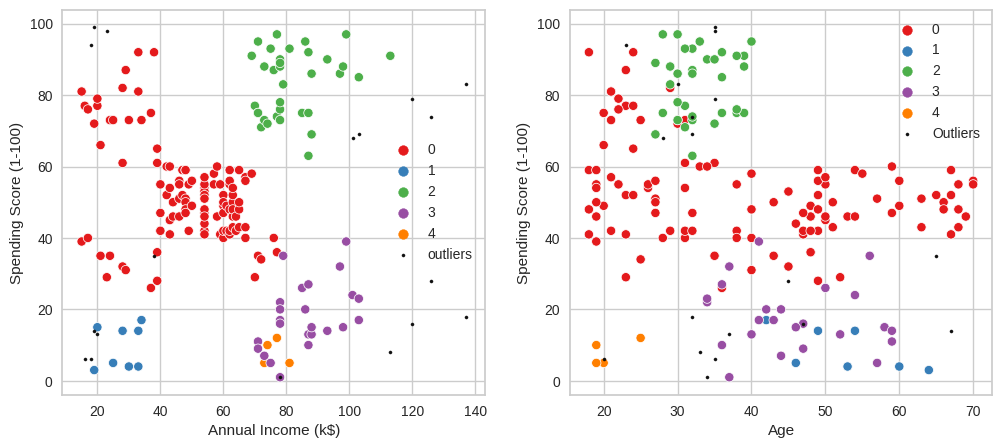

In [ ]:
outliers = dbsclustered[dbsclustered['Cluster'].eq(-1)]
fig2, axes = plt.subplots(1, 2, figsize = (12,5))
 #Scatter plot of 'Annual Income' vs 'Spending Score' without outliers
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                data=dbsclustered[dbsclustered['Cluster'] != -1],
                hue='Cluster', palette='Set1', ax=axes[0], legend='full', s=45)

# Scatter plot of 'Age' vs 'Spending Score' without outliers
sns.scatterplot(x='Age', y='Spending Score (1-100)',
                data=dbsclustered[dbsclustered['Cluster'] != -1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

# Scatter plot of 'Annual Income' vs 'Spending Score' for outliers
axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=5, label = 'outliers', c= "k")

# Scatter plot of 'Age' vs 'Spending Score' for outliers

axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=5, label = 'Outliers', c = 'k')
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()



#Output from the graph 

---

                         (a) The Clusters are not formed properly
                         (b) The Points are not meeting distance properly also 
                             the minimum samples requirement to be recognized as a cluster.






#Now, I am going to plot all the graphs together with KMEANS with 5 clusters and 6 clusters along with the DBSCAN.
I will compare and try to find out the best algorithm for the segmentation.

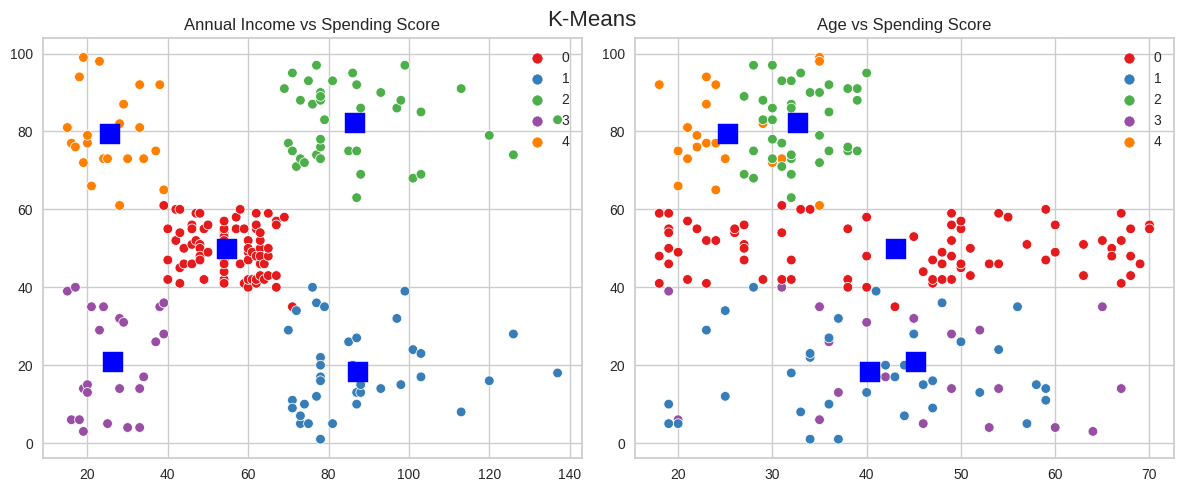

In [ ]:
fig_a.suptitle('K-Means', fontsize=16)
fig_a

Now the K-MEANS with 6 clusters

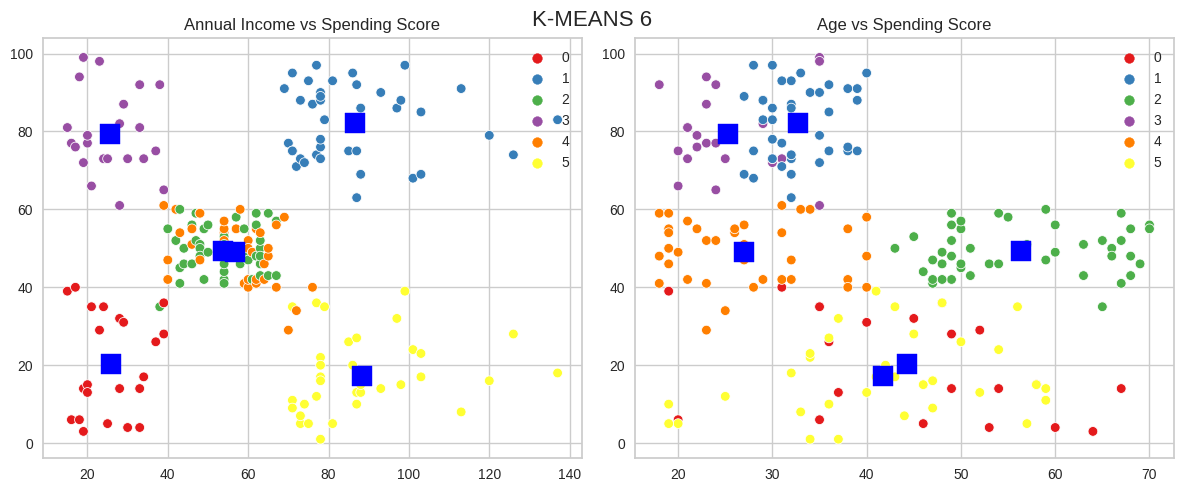

In [ ]:
fig_6.suptitle('K-MEANS 6', fontsize= 16)
fig_6

For DBSCAN

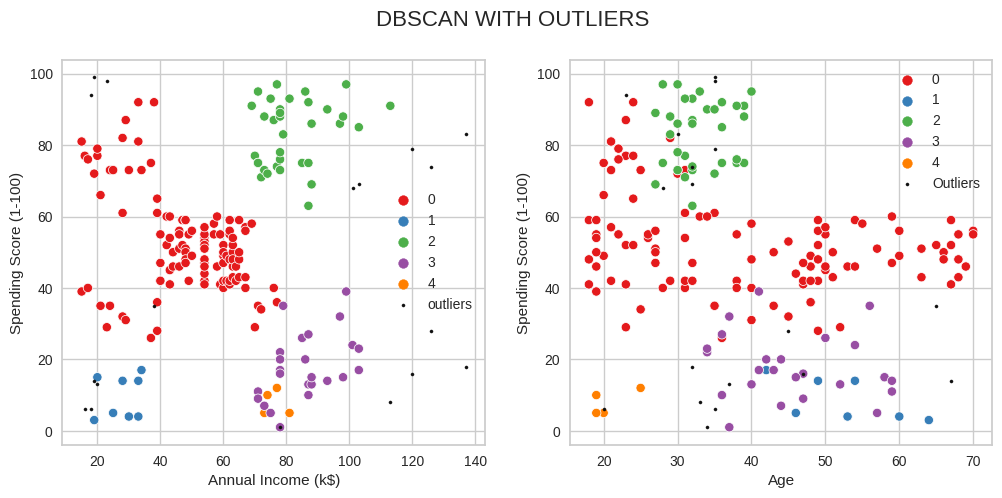

In [ ]:
fig2.suptitle('DBSCAN WITH OUTLIERS', fontsize= 16)
fig2

In [ ]:
from IPython.core.interactiveshell import StrDispatch
Final_cluster_data = pd.concat([Cluster_size, Cluster_size_6, dbscan_size_6], axis=1, sort=False)

# Rename the columns
Final_cluster_data.columns = ['Cluster', 'Cluster_size', 'Cluster', 'Cluster_size_6', 'Cluster', 'dbscan_size_6']
def format_header(val):
    return 'background-color: black; color: white'
Sd = Final_cluster_data.style.set_table_styles([{'selector': 'th', 'props': [('background-color', 'black'), ('color', 'white')]}])

# Display the styled DataFrame
display(Sd)

# Print the table with updated column names
##print(tabulate(Final_cluster_data, headers='keys', tablefmt='fancy_grid', showindex=False, numalign='center', stralign='center', colalign=("center",), 
  #  headerrow=["background-color: black"] * len(Final_cluster_data.columns)))

,Cluster,Cluster_size,Cluster,Cluster_size_6,Cluster,dbscan_size_6
0,0.000000,79.000000,2,44,0,112
1,2.000000,39.000000,1,39,2,34
2,1.000000,37.000000,4,38,3,24
3,3.000000,23.000000,5,35,-1,18
4,4.000000,22.000000,0,22,1,8
5,nan,nan,3,22,4,4
